## Final Project Submission

Please fill out:
* Student name: Collins Kiptoo Kiprotich
* Student pace:full time
* Scheduled project review date/time: 29/8/2022
* Instructor name: 
* Blog post URL:


Importing the necessary libraries:

In [1]:
#importing numpy
import numpy as np
#importing pandas
import pandas as pd
#importing seaborn
import seaborn as sns
#importing matplotlib
import matplotlib.pyplot as plt
import sqlite3

## Data Understanding

To get an understanding of how our data looks like, the first thing to do is to scheme over it so as to determine which data sets will be most useful in testing our hypothesis.

In [2]:

movie_budget = pd.read_csv("tn.movie_budgets.csv")
movie_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [3]:
movie_info = pd.read_csv("rt.movie_info.tsv", delimiter = "\t")
movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [4]:
reviews = pd.read_csv("rt.reviews.tsv", delimiter = "\t", encoding = 'unicode_escape')
reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [5]:
movie = pd.read_csv("tmdb.movies.csv")
movie.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [6]:
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie.head(2)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


Given the diverse nature of the data set provided, I shall use the data that contains vote average, runtime, rating and the revenue earned as these will help test my hypothesis.

## Data Cleaning

Now that I have an understanding on how our available data looks like, I shall choose the dataset that will help me test my hypotheses.

To do any sort of manipulation on the data, I have to convert the production_budget,domestic_gross and worldwide_gross into integers.


### movie_budget

#### Worldwide gross


In [7]:
#Removing the dollar-sign:
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '')

#Removing the commas:
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',', '')

#Mapping the gross into an int:
movie_budget['worldwide_gross']= movie_budget['worldwide_gross'].map(int)

movie_budget['worldwide_gross'].head() # To check the changes made

0    2776345279
1    1045663875
2     149762350
3    1403013963
4    1316721747
Name: worldwide_gross, dtype: int64

#### Domestic Gross

In [8]:
#Removing the dollar-sign:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '')

#Removing the commas:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',', '')

#Mapping the gross into an int:
movie_budget['domestic_gross']= movie_budget['domestic_gross'].map(int)

movie_budget['domestic_gross'].head() # To check the changes made

0    760507625
1    241063875
2     42762350
3    459005868
4    620181382
Name: domestic_gross, dtype: int64

#### Pruduction Budget

In [9]:
#Removing the dollar-sign:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '')

#Removing the commas:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',', '')

#Mapping the gross into an int:
movie_budget['production_budget']= movie_budget['production_budget'].map(int)

movie_budget['production_budget'].head() # To check the changes made

0    425000000
1    410600000
2    350000000
3    330600000
4    317000000
Name: production_budget, dtype: int64

#### Adding Columns

In [10]:
#To get the month of the release date and Add it to the DataFrame as release_month:

movie_budget['release_month'] = movie_budget.release_date.map(lambda x: x[:3])
movie_budget['release_month']

0       Dec
1       May
2       Jun
3       May
4       Dec
       ... 
5777    Dec
5778    Apr
5779    Jul
5780    Sep
5781    Aug
Name: release_month, Length: 5782, dtype: object

In [11]:
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']
movie_budget['total_gross']

0       3536852904
1       1286727750
2        192524700
3       1862019831
4       1936903129
           ...    
5777             0
5778        288977
5779          2676
5780             0
5781        362082
Name: total_gross, Length: 5782, dtype: int64

In [12]:
#Checking to see if there are null values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_month        0
total_gross          0
dtype: int64

In [13]:
#To check that everything is in order:
movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,1936903129


In [14]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   release_month      5782 non-null   object
 7   total_gross        5782 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 361.5+ KB


Now that we have added

### movie_info

In [15]:
#Checking for Null Values
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [16]:
#As we can seen, the rating column has 3 null values. Let's explore these 3 rows
to_drop = movie_info[movie_info["rating"].isna()] 
to_drop

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Given these are all null values, I shall drop them.
movie_info = movie_info[movie_info["rating"].notna()]
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [18]:
#To confirm that the null values have been dropped:
movie_info.isna().sum()
#Great!

id                 0
synopsis          59
rating             0
genre              5
director         196
writer           446
theater_date     356
dvd_date         356
currency        1217
box_office      1217
runtime           27
studio          1063
dtype: int64

In [19]:
#Upon probing, I see that some rows have the value "NR" which means not Rated.
#I shall begin by checking the number of rows that haven't been rated:
len(movie_info[movie_info["rating"] == "NR"])

503

Movies that are yet to be rated constitutes about a third of data. Replacing with mode or randomly will introduce noise to our data set and skew the outcome. I have therefore decided to drop this, so I can work with movies that are already rated.

In [20]:
movie_info = movie_info[movie_info["rating"] != "NR"]
len(movie_info)

1054

In [21]:
movie_info.isna().sum()

id                0
synopsis          2
rating            0
genre             1
director        113
writer          229
theater_date    104
dvd_date        104
currency        733
box_office      733
runtime           6
studio          615
dtype: int64

In [22]:
runtime_null = movie_info[movie_info["runtime"].isna()]
runtime_null

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
102,131,No Sesame. All Street. THE HAPPYTIME MURDERS i...,R,Action and Adventure|Comedy,Brian Henson,Todd Berger|Dee Austin Robertson,"Aug 24, 2018","Dec 4, 2018",NaN,NaN,NaN,STXfilms
434,567,Now graduated from college and out in the real...,PG-13,Comedy,Trish Sie,Mike White|Kay Cannon,"Dec 22, 2017","Mar 20, 2018",$,"104,880,310",NaN,NaN
1023,1325,From the outer reaches of space to the small-t...,R,Action and Adventure|Horror|Science Fiction an...,Shane Black,Shane Black|Fred Dekker,"Sep 14, 2018","Nov 27, 2018",NaN,NaN,NaN,NaN
1078,1389,"From Ron Shelton, writer/director of Tin Cup a...",PG-13,Action and Adventure|Comedy,Ron Shelton,Ron Shelton,"Dec 8, 2017","Feb 27, 2018",NaN,NaN,NaN,Broad Green Pictures
1201,1541,"In the heatwarming live action adventure ""Disn...",PG,Action and Adventure|Comedy|Kids and Family,Marc Forster,Alex Ross Perry,"Aug 3, 2018","Nov 6, 2018",NaN,NaN,NaN,Walt Disney Pictures
1499,1931,Mark Felt - The Man Who Brought Down the White...,PG-13,Drama,Peter Landesman,Peter Landesman,"Sep 29, 2017","Jan 9, 2018",$,"766,428",NaN,Sony Pictures Classics


Given these values only lack the rating, I shall replace the null values with the mean.

In [23]:
#Given the runtime is a string, we have to convert it to in integer
#Removing the minutes:
movie_info["runtime"] = movie_info["runtime"].str.replace('minutes', '')

#Removing the commas:
movie_info["runtime"] = movie_info["runtime"].str.replace(',', '')

#Mapping the gross into an int:
movie_info["runtime"]= movie_info["runtime"].map(float)

<ipython-input-23-b899db7fdbf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info["runtime"] = movie_info["runtime"].str.replace('minutes', '')
<ipython-input-23-b899db7fdbf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info["runtime"] = movie_info["runtime"].str.replace(',', '')
<ipython-input-23-b899db7fdbf5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [24]:
movie_info["runtime"] = movie_info["runtime"].fillna(movie_info["runtime"].mean())

<ipython-input-24-5ae31c678b21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info["runtime"] = movie_info["runtime"].fillna(movie_info["runtime"].mean())


In [25]:
# To check that everuthing is in order
movie_info.isna().sum()

id                0
synopsis          2
rating            0
genre             1
director        113
writer          229
theater_date    104
dvd_date        104
currency        733
box_office      733
runtime           0
studio          615
dtype: int64

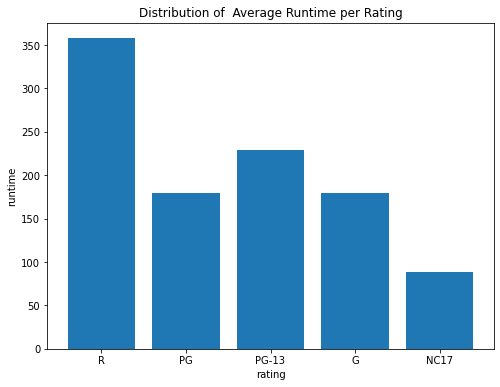

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(movie_info["rating"], movie_info["runtime"] )
#Adding Labels
ax.set_ylabel("runtime")
ax.set_xlabel("rating")
#Adding a Title
ax.set_title("Distribution of  Average Runtime per Rating");

### im.db

In [27]:
conn = sqlite3.connect("im.db")
cur= conn.cursor()

In [28]:
tables = pd.read_sql("""SELECT name
                        FROM sqlite_master
                        WHERE type = "table";


""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


##### movie_basics

In [29]:
movie_basics = pd.read_sql("""SELECT *
                        FROM movie_basics
                        ;


""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [30]:
movie_basics.isna().sum().sort_values(ascending = False)

runtime_minutes    31739
genres              5408
original_title        21
start_year             0
primary_title          0
movie_id               0
dtype: int64

In [31]:
movie_basics = pd.read_sql("""SELECT *
                        FROM movie_basics
                        
                        ;


""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [32]:
movie_length = pd.read_sql("""SELECT DISTINCT movie_id,primary_title, runtime_minutes
                        
                        FROM movie_basics
                        ORDER BY runtime_minutes ASC
                        LIMIT 10;
                        """, conn)
movie_length

,movie_id,primary_title,runtime_minutes
0,tt0069204,Sabse Bada Sukh,None
1,tt0112502,Bigfoot,None
2,tt0139613,O Silêncio,None
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,None
4,tt0250404,Godfather,None
5,tt0263814,On kadin,None
6,tt0285423,Abolição,None
7,tt0293429,Mortal Kombat,None
8,tt0297400,Snowblind,None
9,tt0330811,Regret Not Speaking,None


##### movie_akas

In [33]:
movie_akas = pd.read_sql("""SELECT *
                            FROM movie_akas
                            ;


""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [34]:
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

##### known_for

In [35]:
known_for = pd.read_sql("""SELECT *
                        FROM known_for
                        ;


""", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


##### movie_ratings

In [36]:
movie_ratings = pd.read_sql("""SELECT *
                                FROM movie_ratings
                                ;


""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [37]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [38]:
q = pd.read_sql("""SELECT *
                    FROM movie_ratings
                    ORDER BY averagerating DESC
                    ;


""", conn)
q

,movie_id,averagerating,numvotes
0,tt5390098,10.0,5
1,tt6295832,10.0,5
2,tt1770682,10.0,5
3,tt2632430,10.0,5
4,tt8730716,10.0,5
...,...,...,...
73851,tt7926296,1.0,17
73852,tt3235258,1.0,510
73853,tt7831076,1.0,96
73854,tt3262718,1.0,223


Great!, there are no null values.

## Data Analysis

With my data cleaned, I am now able to analyse the data so as to come up with recommendations for the company. I shall base the success of the movie on the average rating and the total gross revenue.

To understand the distribution of the total gross in regards to the release month, I shall begin by plotting  bargraph to visually display the total gross for the movies released in that month.

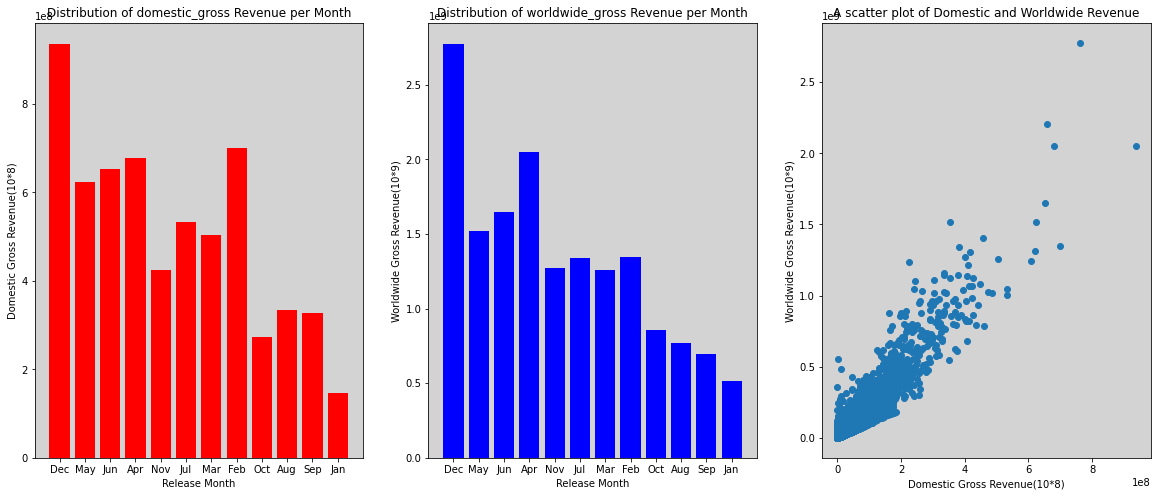

In [39]:
fig, (domestic, worldwide, scatter) = plt.subplots(figsize=(20,8), ncols = 3)
domestic.bar(movie_budget['release_month'],movie_budget['domestic_gross'], color = "red")
worldwide.bar(movie_budget['release_month'],movie_budget['worldwide_gross'], color = "blue")
scatter.scatter(movie_budget["domestic_gross"], movie_budget["worldwide_gross"]);

#Adding Labels to the domestic_gross Fig
domestic.set_ylabel("Domestic Gross Revenue(10*8)")
domestic.set_xlabel("Release Month")
domestic.set_title("Distribution of domestic_gross Revenue per Month")
domestic.set_facecolor("lightgrey")

#Adding Labels to the worldwide_gross Fig
worldwide.set_ylabel("Worldwide Gross Revenue(10*9)")
worldwide.set_xlabel("Release Month")
worldwide.set_title("Distribution of worldwide_gross Revenue per Month")
worldwide.set_facecolor("lightgrey")

#Adding labels to the scatter plot
scatter.set_ylabel("Worldwide Gross Revenue(10*9)")
scatter.set_xlabel("Domestic Gross Revenue(10*8)")
scatter.set_title("A scatter plot of Domestic and Worldwide Revenue")
scatter.set_facecolor("lightgrey");

These figures confirm my hypothesis that domestic and worldwide revenues are positively correlated. 

To determine how movies perform depending on the release month, I can therefore sum them up so as to show how a movie performs both domestically and worldwide.

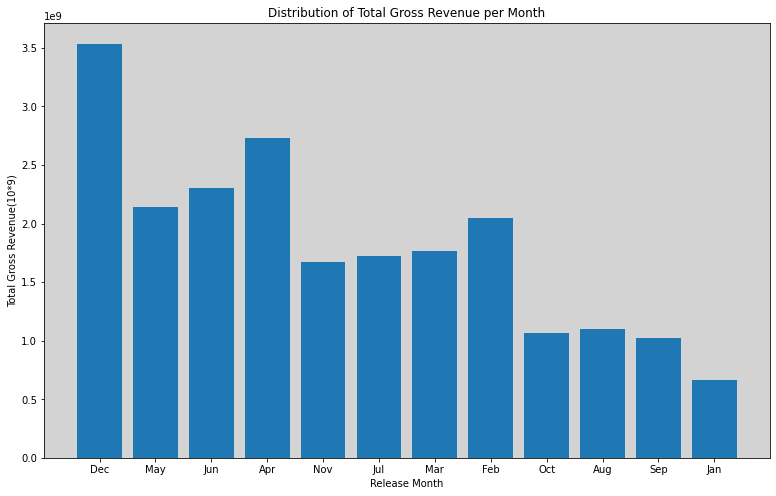

In [40]:
#plotting the bargraph
fig, ax = plt.subplots(figsize=(13,8))
ax.bar(movie_budget['release_month'],movie_budget['total_gross'])
#Adding Labels
ax.set_ylabel("Total Gross Revenue(10*9)")
ax.set_xlabel("Release Month")
#Adding a Title
ax.set_title("Distribution of Total Gross Revenue per Month")
#setting facecolor
ax.set_facecolor("lightgrey");


As seen, movies released in December had the highest revenue and those released in January had the least revenue.
It is also evident that movies released in summer have a higher chance of being hits.
This figure confirms our hypothesis that the release month of a movie influences its success.

In [41]:
#To save figure
fig.savefig("Distribution of Total Gross Revenue per Month")

The next hypothesis to test is whether production budget are directly proportional to the total gross revenue generated by the movie.

To do this, I shall plot a scatter diagram to show the relationship between the production budget and the total revenue.

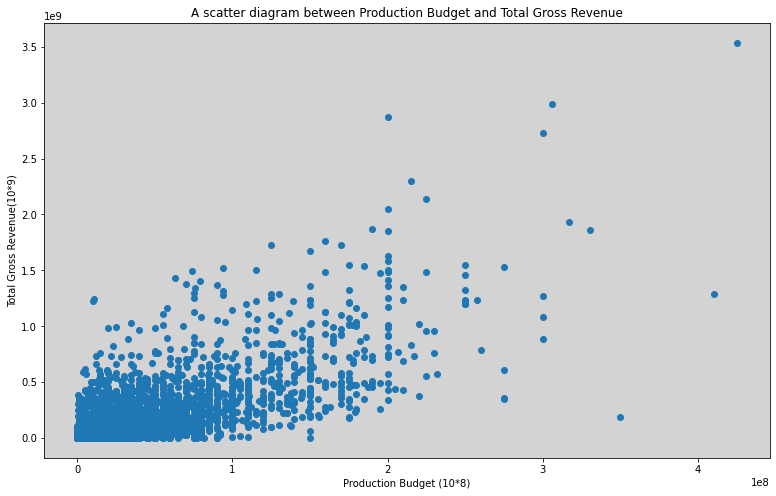

In [42]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(movie_budget['production_budget'], movie_budget['total_gross'])
#Adding Labels
ax.set_ylabel("Total Gross Revenue(10*9)")
ax.set_xlabel("Production Budget (10*8)")
#Adding a Title
ax.set_title("A scatter diagram between Production Budget and Total Gross Revenue")
#setting facecolor
ax.set_facecolor("lightgrey");


In [43]:
#To save figure
fig.savefig("A scatter diagram between Production Budget and Total Gross Revenue")

From the scatter plot above, It is clear that there is no strong corelation between production budget and the total gross revenue. Increasing the production budget does not mean an increase in the gross revenue.

From data understanding section, movies are age restricted and rated so as to inform viewers of the minimum age required to watch the movie. To test my hypothesis that movies rated General have the longest runtimes, I shall plot a bar graph to show the relationship.

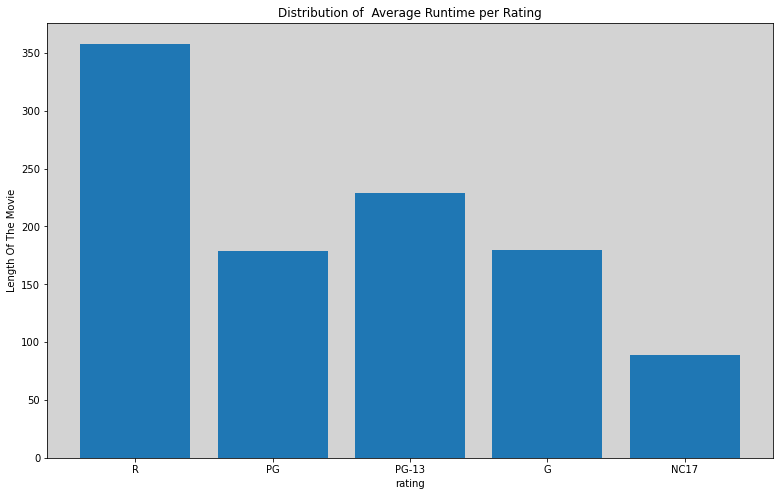

In [44]:
fig, ax = plt.subplots(figsize=(13,8))
ax.bar(movie_info["rating"], movie_info["runtime"] )
#Adding Labels
ax.set_ylabel("Length Of The Movie")
ax.set_xlabel("rating")
#Adding a Title
ax.set_title("Distribution of  Average Runtime per Rating")
#setting facecolor
ax.set_facecolor("lightgrey");

In [45]:
#To save figure
fig.savefig("Distribution of  Average Runtime per Rating")

As can be seen, restricted movies have the longest runtime while movies fir for viewers above 17 years was the shortest.

## Conclusion and Recommendations.


After my analysis, I have come up with the following  conclusions:

1. The month of release of a movie is very critical to it's success. The company should therefore release movies mostly in December and during summer to ensure they have the highest gross revenue.

2. Production budget does not greatly influence the success of a movie. This factor should therefore not carry a lot of weight when deciding whether to produce a movie.

3. Domestic and worldwide gross revenue are directly related.

4. When producing a movie, the age restriction of the movie should be considered. This will then determine the runtime of the movie to be produced.

These conclusions might be incomplete as I have not considered all the factors affecting movie success in my analysis.

To further improve the results of this project, other factors that might affect the success of a movie should be analysed. 
These factors include:

1. The influence of directors, producers and actors over a movie's success.

2. Whether certain movie genres have higher chances of being hits